In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

gene_expression = pd.read_csv("mappedListHugo.csv")
metadata = pd.read_csv("metadata_mappedListHugo.csv")

Accuracy: 0.9633699633699634
Precision: 0.9688888888888889
Recall: 0.9864253393665159

Confusion Matrix:
 [[ 45   7]
 [  3 218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90        52
           1       0.97      0.99      0.98       221

    accuracy                           0.96       273
   macro avg       0.95      0.93      0.94       273
weighted avg       0.96      0.96      0.96       273



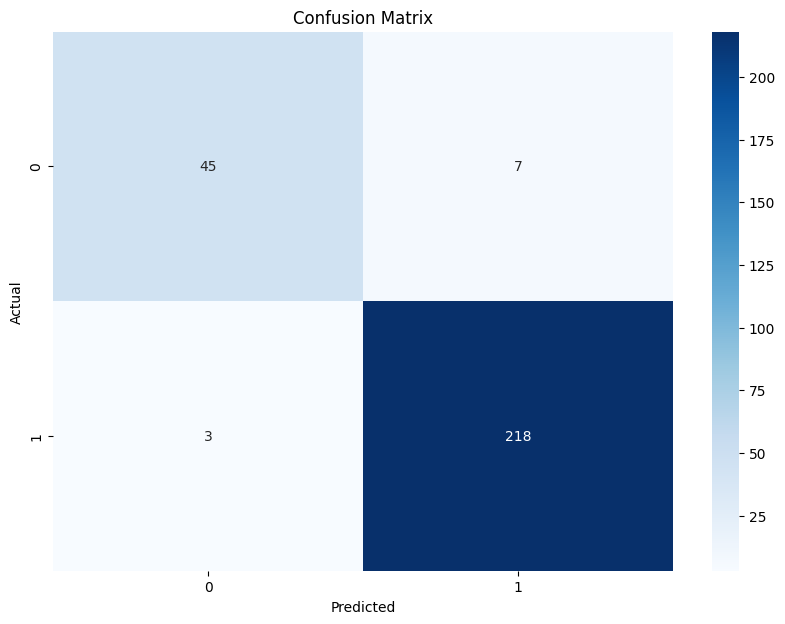

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

expression_data = gene_expression.iloc[:, 3:]
gene_var = expression_data.var(axis=1)
top_genes = expression_data.iloc[gene_var.nlargest(100).index]
top_genes = top_genes.T 
metadata['TB_subject'] = metadata['refinebio_disease'].apply(lambda x: 1 if x == 'tb subjects' else 0)
y = metadata['TB_subject']
X = top_genes.apply(pd.to_numeric, errors='coerce').fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

expression_data = gene_expression.iloc[:, 3:]
gene_var = expression_data.var(axis=1)
top_genes = expression_data.iloc[gene_var.nlargest(100).index]
top_genes = top_genes.T  # Transpose to have samples as rows
metadata['TB_subject'] = metadata['refinebio_disease'].apply(lambda x: 1 if x == 'tb subjects' else 0)
y = metadata['TB_subject']
X = top_genes.apply(pd.to_numeric, errors='coerce').fillna(0)

sample_names = X.index
X_train, X_test, y_train, y_test, sample_names_train, sample_names_test = train_test_split(
    X, y, sample_names, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
results_df = pd.DataFrame({'Sample': sample_names_test, 'TB_subject_Prediction': y_pred})
results_df.to_csv("tb_subject_predictions.csv", index=False)

print("Predictions have been saved to 'tb_subject_predictions.csv'")


Predictions have been saved to 'tb_subject_predictions.csv'


In [6]:
from sklearn.mixture import GaussianMixture
import pandas as pd

gmm = GaussianMixture(n_components=3, random_state=42)  
gmm.fit(top_genes)
cluster_labels = gmm.predict(top_genes)
results_df = pd.DataFrame({'Sample': top_genes.index, 'Cluster': cluster_labels})
results_df.to_csv("sample_clusters.csv", index=False)


c:\Users\BotTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


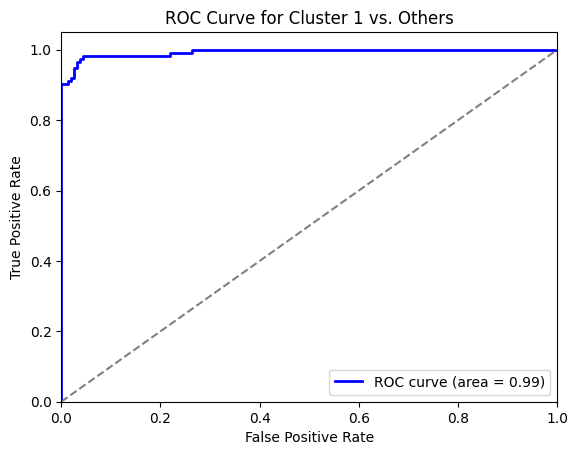

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

binary_labels = (cluster_labels == 1).astype(int)  
X_train, X_test, y_train, y_test = train_test_split(top_genes, binary_labels, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=100, random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cluster 1 vs. Others')
plt.legend(loc="lower right")
plt.show()


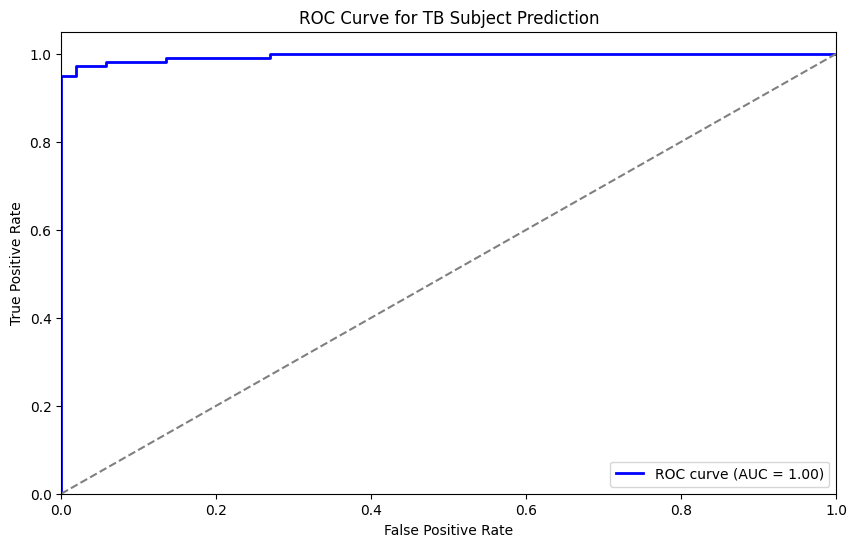

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

expression_data = gene_expression.iloc[:, 3:]
gene_var = expression_data.var(axis=1)
top_genes = expression_data.iloc[gene_var.nlargest(100).index]
top_genes = top_genes.T 
metadata['TB_subject'] = metadata['refinebio_disease'].apply(lambda x: 1 if x.lower() == 'tb subjects' else 0)
y = metadata['TB_subject']
X = top_genes.apply(pd.to_numeric, errors='coerce').fillna(0)
sample_names = X.index
X_train, X_test, y_train, y_test, sample_names_train, sample_names_test = train_test_split(
    X, y, sample_names, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
results_df = pd.DataFrame({'Sample': sample_names_test, 'TB_subject_Prediction': y_pred})
y_prob = model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for TB Subject Prediction')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9853479853479854

Confusion Matrix:
 [[202   4]
 [  0  67]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       206
           1       0.94      1.00      0.97        67

    accuracy                           0.99       273
   macro avg       0.97      0.99      0.98       273
weighted avg       0.99      0.99      0.99       273



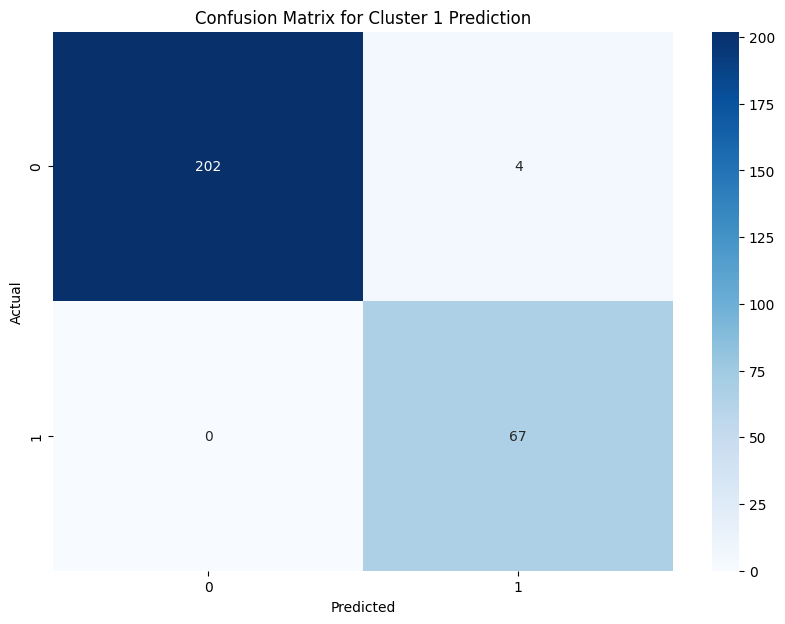

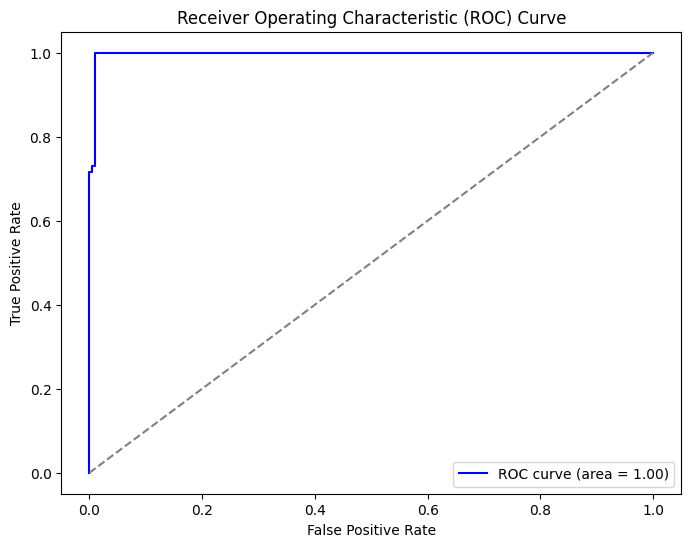

In [9]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

expression_data = gene_expression.iloc[:, 3:]
gene_var = expression_data.var(axis=1)
top_genes = expression_data.iloc[gene_var.nlargest(1000).index]
top_genes = top_genes.T 
X = top_genes.apply(pd.to_numeric, errors='coerce').fillna(0)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
cluster_labels = gmm.predict(X)
metadata['Cluster_1'] = (cluster_labels == 1).astype(int)
y = metadata['Cluster_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Cluster 1 Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [12]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.multitest import multipletests
n_runs = 10
n_components = 3
cluster_stability = np.zeros((X.shape[0], n_runs))
for i in range(n_runs):
    gmm = GaussianMixture(n_components=n_components, random_state=i)
    cluster_labels = gmm.fit_predict(X)
    cluster_stability[:, i] = cluster_labels
cluster_consistency = (cluster_stability == cluster_stability[:, [0]]).mean(axis=1)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
n_splits = 10
class_stability = np.zeros((X.shape[0], n_splits))
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X)
    class_stability[:, i] = y_pred
class_consistency = (class_stability == class_stability[:, [0]]).mean(axis=1)

In [16]:
pearson_corr, pearson_pval = pearsonr(cluster_consistency, class_consistency)
spearman_corr, spearman_pval = spearmanr(cluster_consistency, class_consistency)
print("Pearson correlation:", pearson_corr, "p-value:", pearson_pval)
print("Spearman correlation:", spearman_corr, "p-value:", spearman_pval)
pvals = [pearson_pval, spearman_pval]
_, corrected_pvals, _, _ = multipletests(pvals, method='fdr_bh')
print("Corrected p-values (FDR):", corrected_pvals)


Pearson correlation: -0.0024243498665618654 p-value: 0.941811867517524
Spearman correlation: -0.004233604284371759 p-value: 0.8985711663826583
Corrected p-values (FDR): [0.94181187 0.94181187]


Accuracy: 0.9304029304029304
Precision: 0.9353448275862069
Recall: 0.9819004524886877

Confusion Matrix:
 [[ 37  15]
 [  4 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80        52
           1       0.94      0.98      0.96       221

    accuracy                           0.93       273
   macro avg       0.92      0.85      0.88       273
weighted avg       0.93      0.93      0.93       273



c:\Users\BotTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


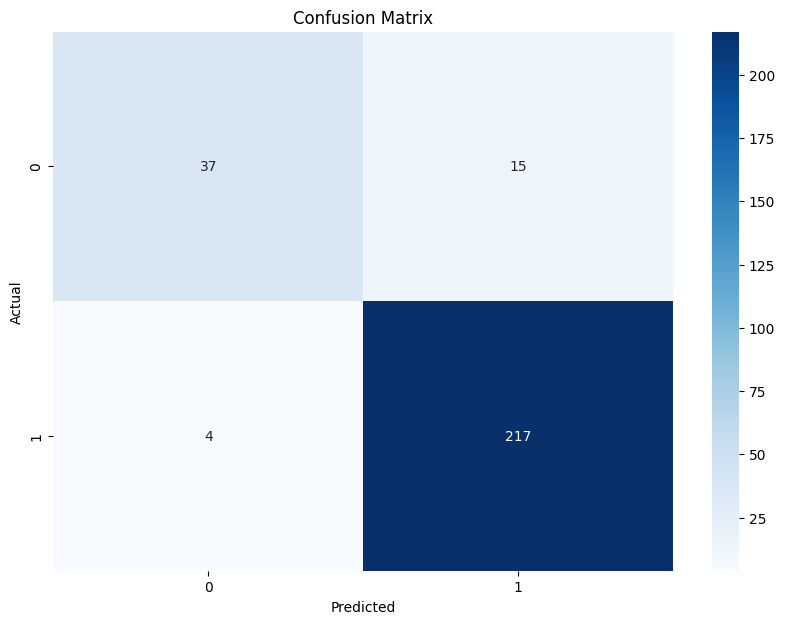

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

expression_data = gene_expression.iloc[:, 3:]
gene_var = expression_data.var(axis=1)
top_genes = expression_data.iloc[gene_var.nlargest(100).index]
top_genes = top_genes.T 
metadata['TB_subject'] = metadata['refinebio_disease'].apply(lambda x: 1 if x == 'tb subjects' else 0)
y = metadata['TB_subject']
X = top_genes.apply(pd.to_numeric, errors='coerce').fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
